# Load library

In [2]:
# Importing missing packages
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install xgboost

'C:\Users\Rishab' is not recognized as an internal or external command,
operable program or batch file.
'C:\Users\Rishab' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
# Selecting pacakages needed for analysis

from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sn
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Load Dataset

In [5]:
# reading the data set from a csv file - can replace the uploaded data set with any data set,
# but must upload the new data set OR use the file path
data = pd.read_csv('test set balanced.csv')
# Lines below were utilized for analysis of SAT/ACT scores - excluded for this analysis
# print(data['SAT'].isnull().sum())
# print(data['ACT'].isnull().sum())
# data['SAT'] = data['SAT'].fillna(0)
# data['ACT'] = data['ACT'].fillna(0)

# Assigns 1 to students who do not return and 0 to students who do return
data['Enrolled Spring?'] = data['Enrolled Spring?'].replace([0,1],[1,0])

# reading only relevant factors into data, assigning the label, and removing extra blank rows from end of set 
X = data[['URM?','Sex?','First Gen?','ASU Scholarships?','No CI?', 'CI Score', 'Attended E2', 'Meets MAT Requirements?','Resident?','Ever in housing?', 'Enrolled in ASU 101?','Honors?', 'Pell Eligible?', 'Very High', 'High ','Moderate ','Low','Very Low ']]
X = X[:9483]

# Creates a new data set that includes SAT/ACT and removes CI
X_2 = data[['URM?','Sex?','First Gen?','ASU Scholarships?','SAT','ACT', 'Attended E2', 'Meets MAT Requirements?','Resident?','Ever in housing?', 'Enrolled in ASU 101?','Honors?', 'Pell Eligible?', 'Very High', 'High ','Moderate ','Low','Very Low ']]
X_2 = X_2[:9483]

# Sets the label and excludes the blank cells below the data from analysis
y = data['Enrolled Spring?']
y = y[:9483]
y = (y != 0)

C:\Users\Rishab Sg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
# Verifies the data types and ensures no missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   URM?                     9483 non-null   float64
 1   Sex?                     9483 non-null   float64
 2   First Gen?               9483 non-null   float64
 3   ASU Scholarships?        9483 non-null   float64
 4   No CI?                   9483 non-null   float64
 5   CI Score                 9483 non-null   float64
 6   Attended E2              9483 non-null   float64
 7   Meets MAT Requirements?  9483 non-null   float64
 8   Resident?                9483 non-null   float64
 9   Ever in housing?         9483 non-null   float64
 10  Enrolled in ASU 101?     9483 non-null   float64
 11  Honors?                  9483 non-null   float64
 12  Pell Eligible?           9483 non-null   float64
 13  Very High                9483 non-null   float64
 14  High                    

In [7]:
# Splits the data into a testing-training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Creates new testing-training set for the ACT/SAT data set
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, random_state=0)

In [8]:
# Scaling the data
# Chose min max scaler b/c all variables, excluding CI score, are binary
# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Data Visualization

<AxesSubplot:xlabel='CI Score', ylabel='Count'>

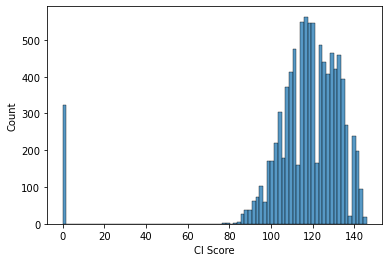

In [9]:
sn.histplot(data=X, x=X['CI Score'])

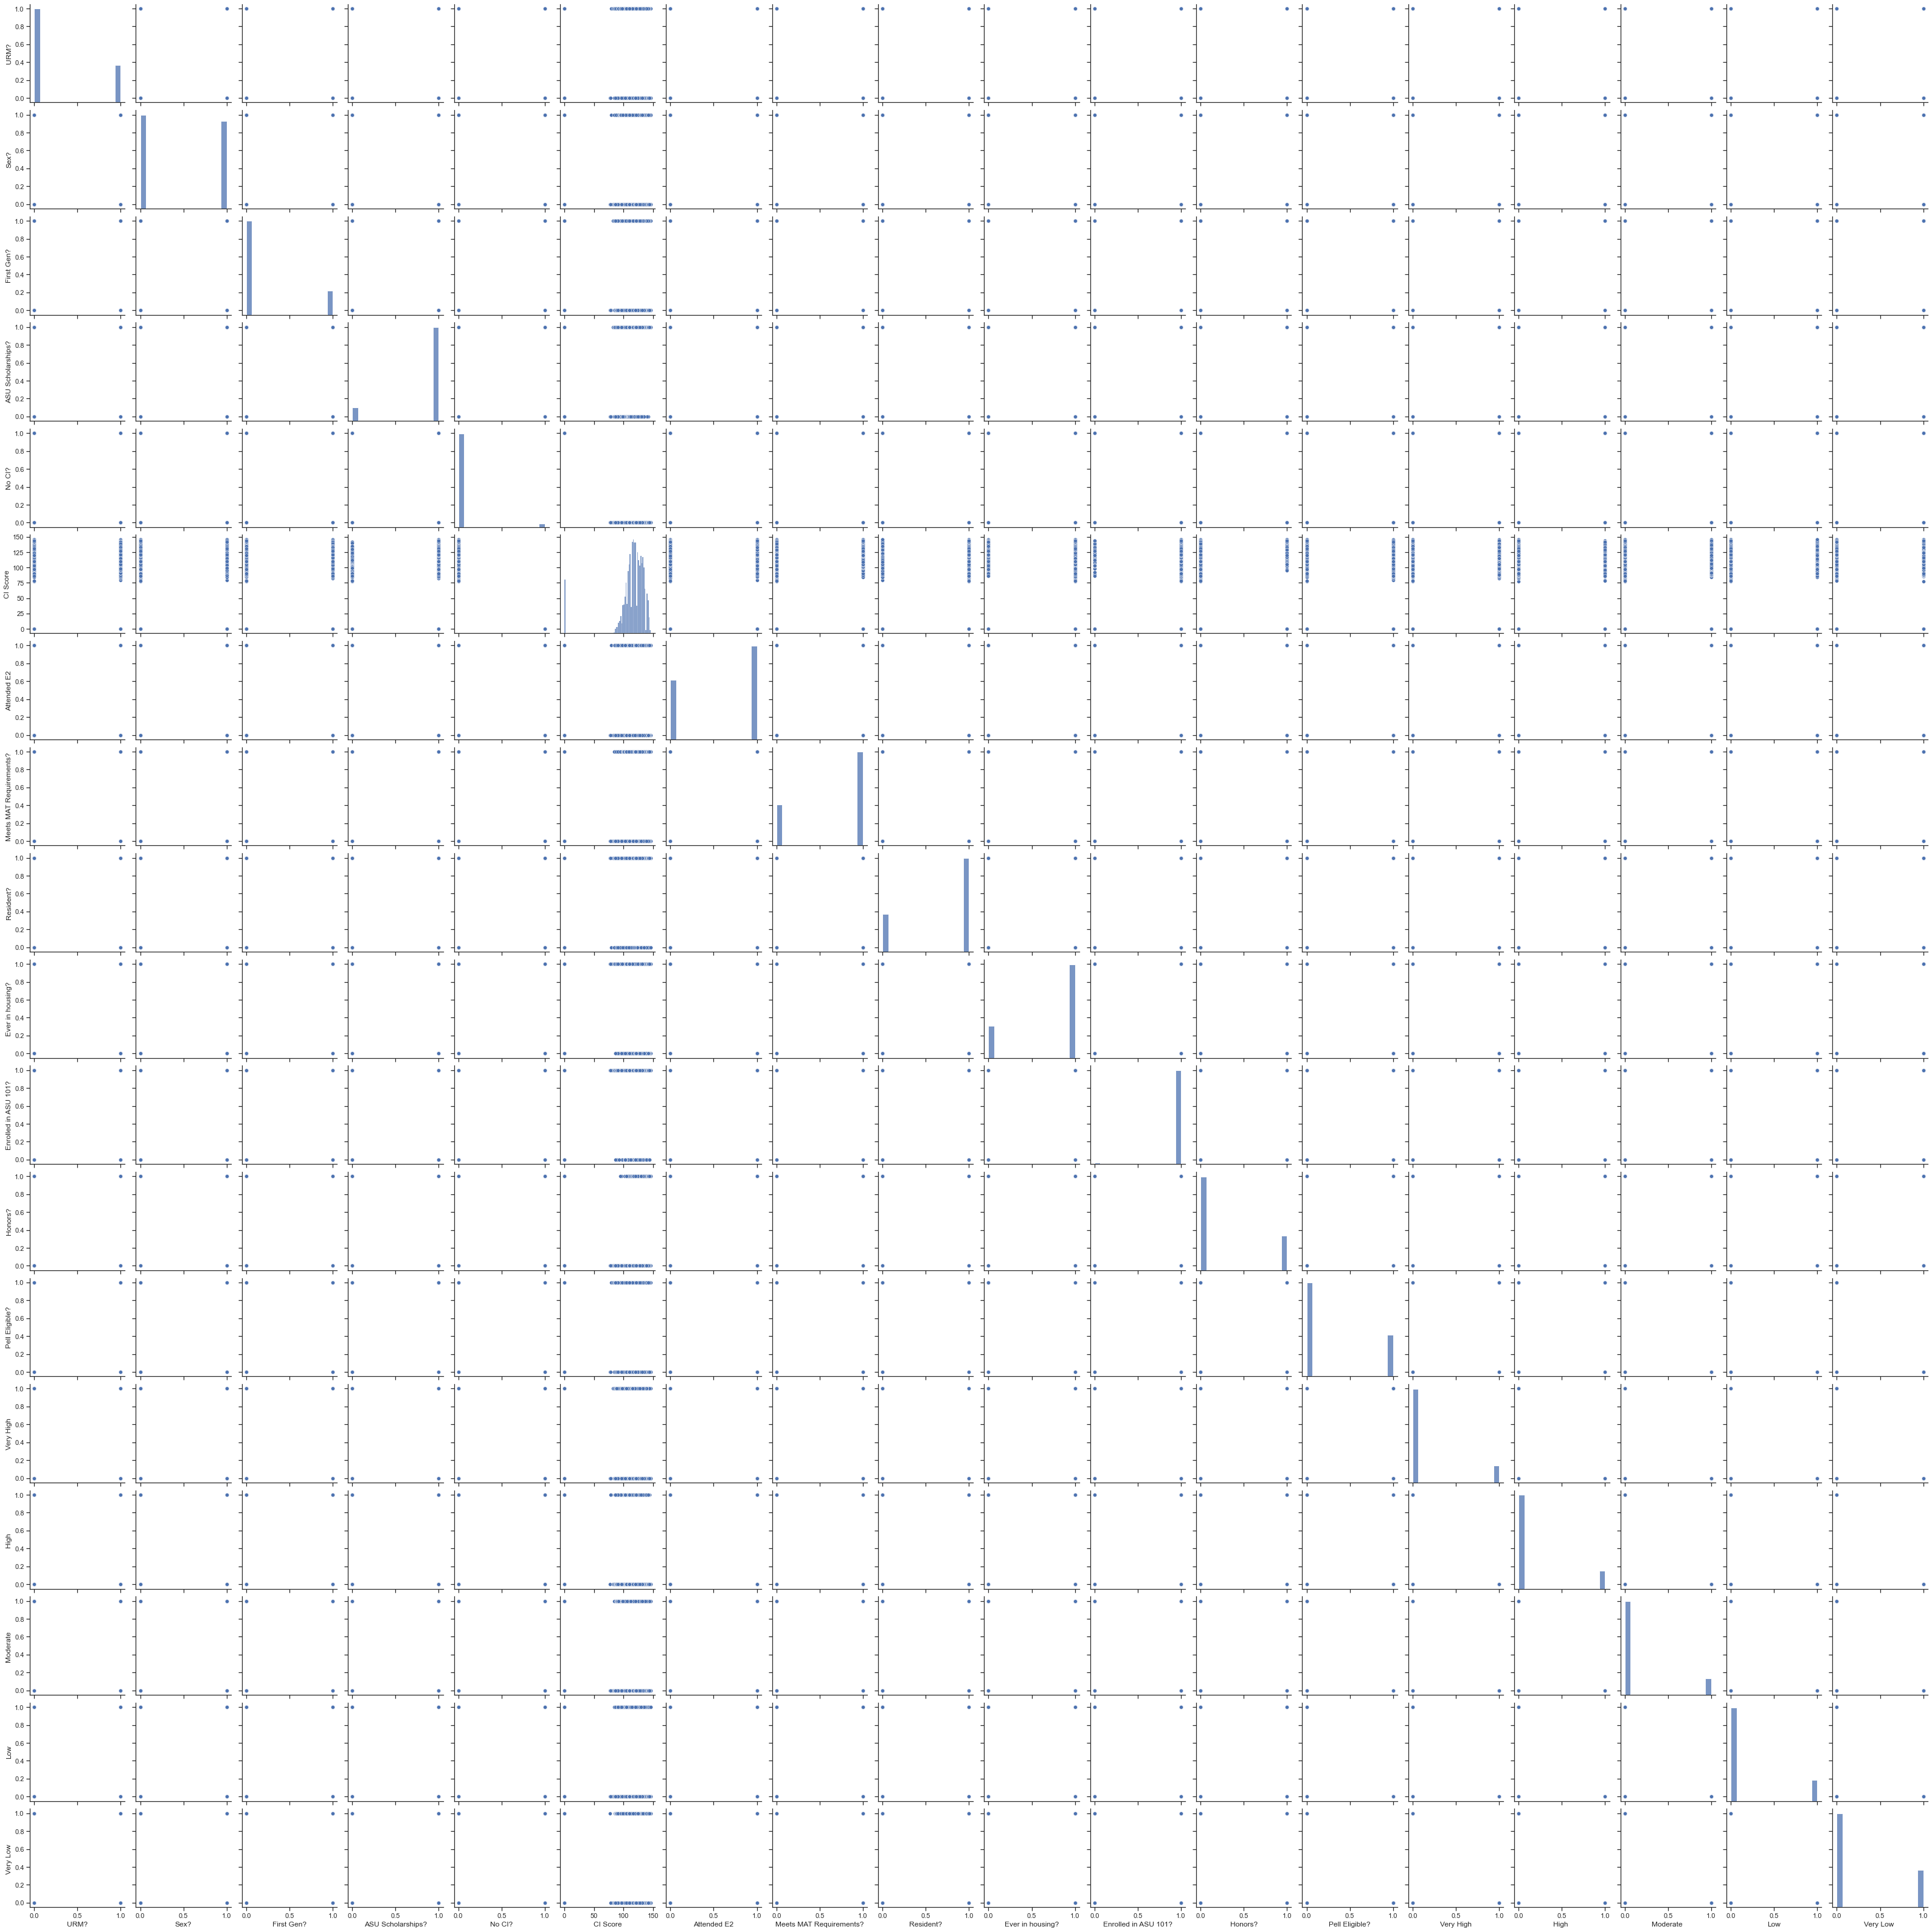

In [10]:
sn.set_theme(style="ticks")

sn.pairplot(X)

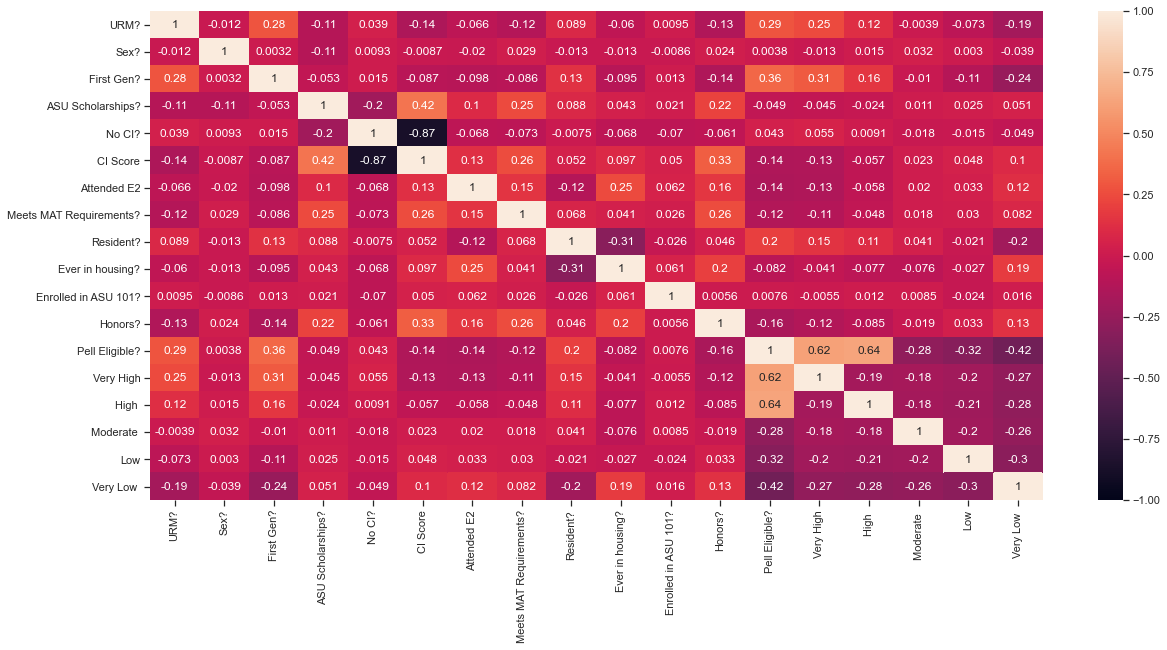

In [11]:
# Creating a correlation matrix to identify any potential correlations between factors
# Only high correlations appear between CI Score/No CI? and Pell Eligible?/Very High 
# Indicates need for feature selection
corrMatrix = X.corr()
plt.figure(figsize=(20, 9))
sn.heatmap(corrMatrix, annot=True, vmin = -1)
plt.show()

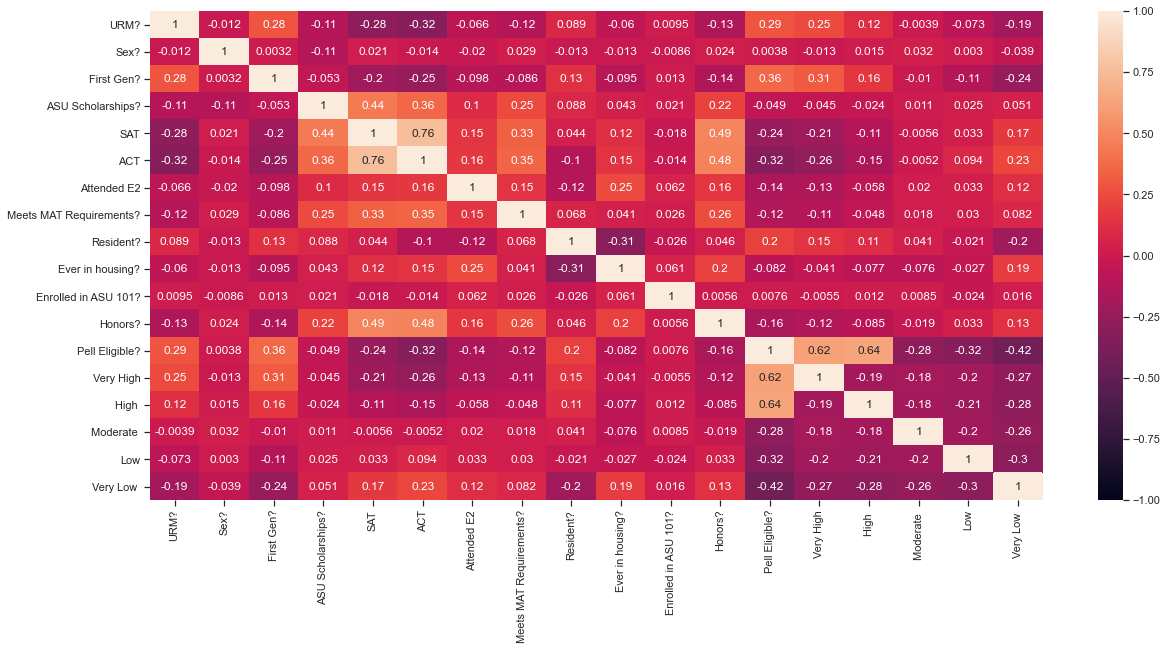

In [14]:
# Second correlation matrix for the SAT/ACT data
corrMatrix_2 = X_2.corr()
plt.figure(figsize=(20, 9))
sn.heatmap(corrMatrix_2, annot=True, vmin = -1)
plt.show()

# Random Forest
- F1 score/AUC (ROC curive)
- Confusion Matrix
https://scikit-learn.org/stable/modules/model_evaluation.html

In [16]:
# Choosing which features to perform the grid search on
max_depth=[2,3,4,5,6,7] # max upto 20 can be taken 
ntrees = [16,32,64,128] # upto 324 
max_features = [1, 3, 5, 7, 9, 12, 15] # around 22 
parameters = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features}

# Utilizing grid search to find the best set of parameters for Random Forest
model =  RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1, class_weight ='balanced')
clf = GridSearchCV(model, parameters,return_train_score=True,cv=10, scoring = 'f1')
# Fitting the model
clf.fit(X_train, y_train)

# Scoring the model using the test set
score = clf.score(X_test, y_test)
# Estimating F1 score, the best parameters, and feature importance
print('F1:{},Best parameters:{}, feature importance:{}'.format(score,clf.best_params_,clf.best_estimator_.feature_importances_))

F1:0.1644144144144144,Best parameters:{'max_depth': 5, 'max_features': 3, 'n_estimators': 128}, feature importance:[0.02378251 0.04501267 0.03116905 0.1121875  0.026225   0.27711137
 0.04326214 0.14958286 0.05482076 0.05081729 0.01694036 0.06625816
 0.01863692 0.02219897 0.01394378 0.01057735 0.0168049  0.02066841]


In [209]:
# Re-fitting the model with the best parameters to visaulize feature importance
rf =  RandomForestClassifier(max_depth=5, n_estimators=128, max_features=3, class_weight ='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=3,
                       n_estimators=128)

In [30]:
# Displaying feature importance
rf_feature_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
rf_feature_importance

,feature importance
CI Score,0.298852
ASU Scholarships?,0.135513
Meets MAT Requirements?,0.123113
Honors?,0.078157
Resident?,0.054129
Ever in housing?,0.048084
Attended E2,0.038909
Sex?,0.036653
First Gen?,0.031767
Very Low,0.029655


AUC is: 0.7324757169287697


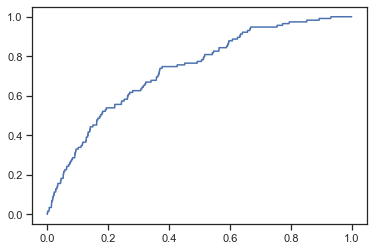

In [210]:
# Calculating the probability a student returns and assigning a label to the students in the test set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
plt.plot(fpr, tpr)
print("AUC is: " + str(metrics.auc(fpr, tpr)))

[[1759  497]
 [  53   62]]
F1 score is: 0.18397626112759644


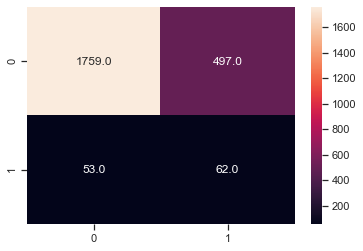

In [212]:
# Adjusting the threshold value to find an optimal threshold
threshold = .54
predicted = (y_pred_prob[:,1] >= threshold).astype('int')

# Creating and displaying the confusion matrix
confusion_matrix_val = confusion_matrix(y_test, predicted)
print(confusion_matrix_val)
sn.heatmap(confusion_matrix_val, annot=True, fmt='.1f')

# Calculating F1 score for model evaluation/comparison
f1_score_val = f1_score(y_test, predicted,average='binary')
print("F1 score is: " + str(f1_score_val))


In [228]:
#cv score: -r
scores = cross_val_score(rf, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(rf, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.6963
K-fold CV average score: 0.7085
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.7106512  0.70234643 0.69773267 0.70304468 0.71635693]
[0.70268846 0.7195572  0.67053242 0.67563291 0.76107595]


# SHAP values for Random Forest
value https://github.com/slundberg/shap#citations
https://seaborn.pydata.org/generated/seaborn.boxplot.html

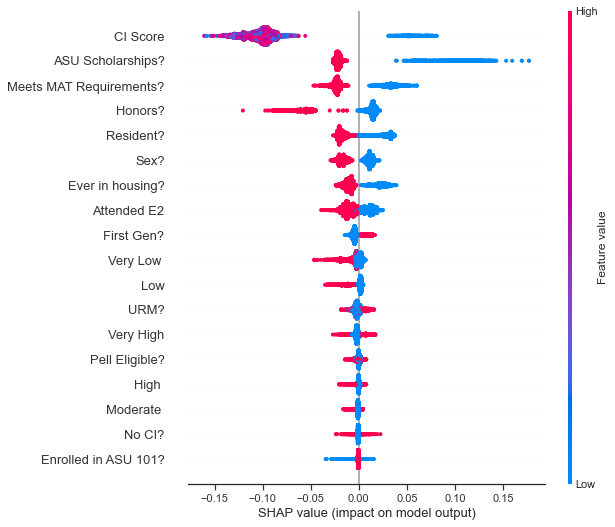

In [35]:
# Using shap values to visualize feature importance for Random Forest
# HIGH values of CI increase retention likelihood. LOW values of CI decrease retention likelihood, but by less.
# NOT meeting MAT requirements decreases likelihood of retention.
# Students enrolled in honors increases likelihood of retention, but vice cersa has minimal effect.
# NO Scholarships (AKA low values) decreases retention likelihood.
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X)

# Naive Bayes

In [47]:
alpha=[.001, .05, .01,.30,.50,.70,.90,1]
parameters_a = {'alpha':alpha}

model_a = ComplementNB(alpha=1) 
clf_a = GridSearchCV(model_a, parameters_a,return_train_score=True,cv=10, scoring = 'f1')
clf_a.fit(X_train, y_train)
score_a = clf_a.score(X_test, y_test)
clf_a.fit(X_train, y_train)
print('F1:{},Best parameters:{}'.format(score_a,clf_a.best_params_))


F1:0.14673366834170853,Best parameters:{'alpha': 0.3}


In [48]:
nb = ComplementNB(alpha=0.3)
nb.fit(X_train, y_train)

nb_coef = pd.DataFrame(nb.coef_.T, index=X.columns, columns=['coefficients']).sort_values('coefficients', ascending=False)
nb_coef

,coefficients
No CI?,5.517294
Very High,3.988909
Moderate,3.985905
High,3.905270
Low,3.748527
First Gen?,3.673367
Honors?,3.366005
URM?,3.346300
Very Low,3.313107
Pell Eligible?,3.273598


# Naive Bayes Evaluation

AUC is: 0.6795309127351218


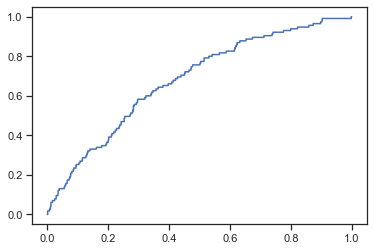

In [49]:
y_pred_a = clf_a.predict(X_test)
y_pred_prob_a = clf_a.predict_proba(X_test)

# use .predict or .predict_proba on new set of students to gain predictions on them


# change y_pred_prob to predicted to adjust threshold
fpr_a, tpr_a, thresholds = metrics.roc_curve(y_test, y_pred_prob_a[:,1], pos_label=1)
plt.plot(fpr_a, tpr_a)
print("AUC is: " + str(metrics.auc(fpr_a, tpr_a)))



[[1575  681]
 [  48   67]]
F1 score is: 0.1552723059096176


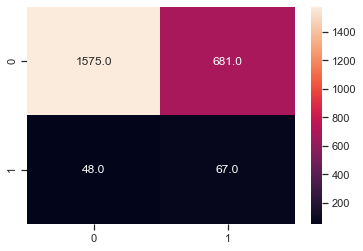

In [224]:
threshold = .53
predicted_a = (y_pred_prob_a[:,1] >= threshold).astype('int')

confusion_matrix_val_a = confusion_matrix(y_test, predicted_a)
print(confusion_matrix_val_a)
sn.heatmap(confusion_matrix_val_a, annot=True, fmt='.1f')

f1_score_val_a = f1_score(y_test, predicted_a,average='binary')
print("F1 score is: " + str(f1_score_val_a))

In [229]:
#cv score: -r
scores = cross_val_score(nb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(nb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(nb, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.6285
K-fold CV average score: 0.6278
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.62140786 0.63274453 0.63234906 0.64228285 0.63859233]
[0.6473379  0.65735372 0.62150764 0.6271097  0.66402954]


# Adaboost

In [139]:
ntrees = [16,32,64,128]
learning_rate = [0.1,0.3,0.5,0.7,0.9]
parameters_b = {'n_estimators':ntrees,'learning_rate':learning_rate}

# no balancing parameter
model_b =  AdaBoostClassifier(n_estimators=100, learning_rate=1)
clf_b = GridSearchCV(model_b, parameters_b,return_train_score=True,cv=10, scoring = 'f1')
clf_b.fit(X_train, y_train)
score_b = clf_b.score(X_test, y_test)
clf_b.fit(X_train, y_train)
print('F1:{},Best parameters:{}, feature importance:{}'.format(score_b,clf_b.best_params_,clf_b.best_estimator_.feature_importances_))

F1:0.0,Best parameters:{'learning_rate': 0.1, 'n_estimators': 16}, feature importance:[0.     0.     0.     0.25   0.     0.4375 0.     0.25   0.     0.0625
 0.     0.     0.     0.     0.     0.     0.     0.    ]


In [140]:
#Adaboost run on set using SAT & ACT scores
ntrees_ba = [16,32,64,128]
learning_rate_ba = [0.1,0.3,0.5,0.7,0.9]
parameters_ba = {'n_estimators':ntrees_ba,'learning_rate':learning_rate_ba}

# no balancing parameter
model_ba =  AdaBoostClassifier(n_estimators=100, learning_rate=1)
clf_ba = GridSearchCV(model_ba, parameters_ba,return_train_score=True,cv=10, scoring = 'f1')
clf_ba.fit(X_train, y_train)
score_ba = clf_ba.score(X_test, y_test)
clf_ba.fit(X_train, y_train)
print('F1:{},Best parameters:{}, feature importance:{}'.format(score_ba,clf_ba.best_params_,clf_ba.best_estimator_.feature_importances_))

F1:0.0,Best parameters:{'learning_rate': 0.1, 'n_estimators': 16}, feature importance:[0.     0.     0.     0.25   0.     0.4375 0.     0.25   0.     0.0625
 0.     0.     0.     0.     0.     0.     0.     0.    ]


In [141]:
adab =  AdaBoostClassifier(n_estimators=16, learning_rate=.1)
adab.fit(X_train, y_train)

adab_feature_importance = pd.DataFrame(adab.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
adab_feature_importance


,feature importance
CI Score,0.4375
ASU Scholarships?,0.2500
Meets MAT Requirements?,0.2500
Ever in housing?,0.0625
Honors?,0.0000
Low,0.0000
Moderate,0.0000
High,0.0000
Very High,0.0000
Pell Eligible?,0.0000


# Adaboost Evaluation

AUC is: 0.7069784921369103


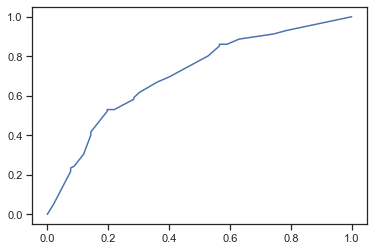

In [230]:
y_pred_b = clf_b.predict(X_test)
y_pred_prob_b = clf_b.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_b, tpr_b, thresholds = metrics.roc_curve(y_test,y_pred_prob_b[:,1], pos_label=1)
plt.plot(fpr_b, tpr_b)
print("AUC is: " + str(metrics.auc(fpr_b, tpr_b)))



[[1614  642]
 [  47   68]]
              precision    recall  f1-score   support

       False       0.97      0.72      0.82      2256
        True       0.10      0.59      0.16       115

    accuracy                           0.71      2371
   macro avg       0.53      0.65      0.49      2371
weighted avg       0.93      0.71      0.79      2371

F1 score is: 0.16484848484848486


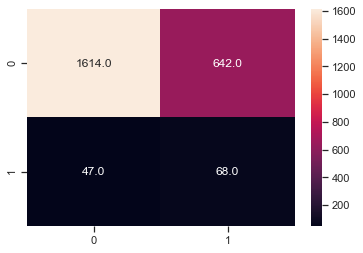

In [236]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_b = .19 ###########
predicted_b = (y_pred_prob_b[:,1] >= threshold_b).astype('int')

confusion_matrix_val_b = confusion_matrix(y_test, predicted_b)
print(confusion_matrix_val_b)
sn.heatmap(confusion_matrix_val_b, annot=True, fmt='.1f')

class_report_b = classification_report(y_test, predicted_b)
print(class_report_b)

f1_score_val_b = f1_score(y_test, predicted_b,average='binary')
print("F1 score is: " + str(f1_score_val_b))

In [237]:
#cv score: -r
scores = cross_val_score(nb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(nb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(nb, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.6285
K-fold CV average score: 0.6288
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.62140786 0.63274453 0.63234906 0.64228285 0.63859233]
[0.6473379  0.65735372 0.62150764 0.6271097  0.66402954]


AUC is: 0.7069784921369103
[[2083  173]
 [  88   27]]
              precision    recall  f1-score   support

       False       0.96      0.92      0.94      2256
        True       0.14      0.23      0.17       115

    accuracy                           0.89      2371
   macro avg       0.55      0.58      0.56      2371
weighted avg       0.92      0.89      0.90      2371

F1 score is: 0.17142857142857146


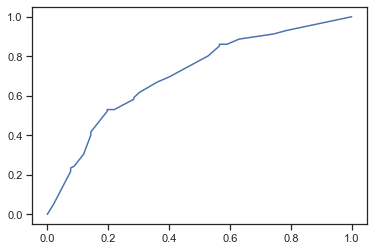

In [241]:
# prediction for X2
y_pred_ba = clf_ba.predict(X_test)
y_pred_prob_ba = clf_ba.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_ba, tpr_ba, thresholds = metrics.roc_curve(y_test,y_pred_prob_ba[:,1], pos_label=1)
plt.plot(fpr_ba, tpr_ba)
print("AUC is: " + str(metrics.auc(fpr_ba, tpr_ba)))

threshold_ba = .23 #####################
predicted_ba = (y_pred_prob_ba[:,1] >= threshold_ba).astype('int')

confusion_matrix_val_ba = confusion_matrix(y_test, predicted_ba)
print(confusion_matrix_val_ba)

class_report_ba = classification_report(y_test, predicted_ba)
print(class_report_ba)

f1_score_val_ba = f1_score(y_test, predicted_ba,average='binary')
print("F1 score is: " + str(f1_score_val_ba))

# Bagging 

In [62]:
# Bootstrap applied - samples drawn with replacement, features not
ntrees = [16,32,64,128]
max_samples = [1, 5, 10, 25, 50, 100]
max_features = [1, 2, 4, 6, 8, 10]
parameters_c = {'max_samples':max_samples, 'n_estimators':ntrees,'max_features':max_features}

# no balancing parameter
model_c =  BaggingClassifier(n_estimators=100, max_samples=1, max_features=1)
clf_c = GridSearchCV(model_c, parameters_c,return_train_score=True,cv=10, scoring = 'f1')
clf_c.fit(X_train, y_train)
score_c = clf_c.score(X_test, y_test)
clf_c.fit(X_train, y_train)
print('F1:{},Best parameters:{}'.format(score_c,clf_c.best_params_))

F1:0.0,Best parameters:{'max_features': 1, 'max_samples': 1, 'n_estimators': 16}


# Bagging Evaluation

AUC is: 0.5


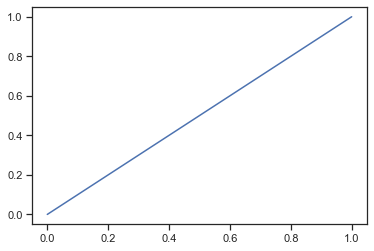

In [63]:
y_pred_c = clf_c.predict(X_test)
y_pred_prob_c = clf_c.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_c, tpr_c, thresholds = metrics.roc_curve(y_test, y_pred_prob_c[:,1], pos_label=1)
plt.plot(fpr_c, tpr_c)
print("AUC is: " + str(metrics.auc(fpr_c, tpr_c)))

[[2256    0]
 [ 115    0]]
F1 score is: 0.0


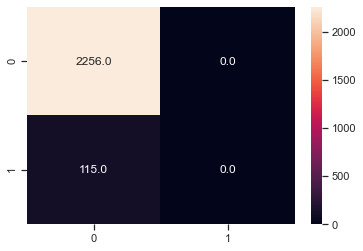

In [64]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_c = .06
predicted_c = (y_pred_prob_c[:,1] >= threshold_c).astype('int')

confusion_matrix_val_c = confusion_matrix(y_test, predicted_c)
print(confusion_matrix_val_c)
sn.heatmap(confusion_matrix_val_c, annot=True, fmt='.1f')

f1_score_val_c = f1_score(y_test, predicted_c,average='binary')
print("F1 score is: " + str(f1_score_val_c))

In [80]:
bag = BaggingClassifier(n_estimators=128, max_samples=100, max_features=4)
bag.fit(X_train, y_train)

BaggingClassifier(max_features=4, max_samples=100, n_estimators=128)

# Gradient Boosting

In [180]:
# use xgboost instead
ntrees = [16,32,64,128]
max_depth=[2,3,4,5,6,7]
max_features = [1, 2, 4, 6, 8, 10]
learning_rate = [0.1,0.3,0.5,0.7,0.9] #start from 0.01,0.05,0.1,0.5 
parameters_d = {'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features, 'learning_rate':learning_rate}

# no balancing parameter
model_d =  GradientBoostingClassifier(loss='deviance', learning_rate=1, n_estimators=100, max_features=1, max_depth=3)
clf_d = GridSearchCV(model_d, parameters_d,return_train_score=True,cv=5, scoring = 'accuracy')
clf_d.fit(X_train, y_train)
score_train = clf_d.score
score_d = clf_d.score(X_test, y_test)
clf_d.fit(X_train, y_train)
print('test acc:{}, Best parameters:{}, feature importance:{}'.format(score_d,clf_d.best_params_,clf_d.best_estimator_.feature_importances_))

F1:0.9510754955714888, Best parameters:{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 8, 'n_estimators': 16}, feature importance:[0.00114563 0.02502174 0.04588059 0.23106648 0.00819314 0.26553642
 0.03289738 0.15703831 0.04356063 0.06103889 0.01063236 0.06905265
 0.         0.00552259 0.01023829 0.00671663 0.00199511 0.02446317]


In [242]:
#learning_rate = [.1,.3,.5,.7,.9]
n_estimators=[16,32,64,128]
#gamma = [0,10,100,1000]
#alpha=[0,10,100,1000]
max_depth=[2,3,4,5,6,7]
eta = [0.1,0.3,0.5,0.7,0.9]
parameters_da = {'max_depth':max_depth,'n_estimators':n_estimators, 'eta':eta}
# no balancing parameter
model_da =  XGBClassifier(objective='binary:logistic',learning_rate=.1, n_estimators=100, max_depth=2,eta=.1,eval_metric='logloss',use_label_encoder=False)
clf_da = GridSearchCV(model_da, parameters_da,return_train_score=True,cv=5, scoring = 'f1')
clf_da.fit(X_train, y_train)
score_da = clf_da.score(X_test, y_test)
clf_da.fit(X_train, y_train)
print('F1:{},Best parameters:{}, feature importance:{}'.format(score_da,clf_da.best_params_,clf_da.best_estimator_.feature_importances_))

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


F1:0.017241379310344827,Best parameters:{'eta': 0.1, 'max_depth': 3, 'n_estimators': 16}, feature importance:[0.         0.04694916 0.0745028  0.13243835 0.         0.21441913
 0.13617118 0.10813992 0.04412945 0.05934748 0.05950736 0.
 0.         0.         0.         0.         0.         0.12439516]


In [243]:
xgb = XGBClassifier(objective='binary:logistic',learning_rate=.1, n_estimators=16, max_depth=3, gamma=0, alpha=0,eta=.1,eval_metric='logloss',use_label_encoder=False)
xgb.fit(X_train, y_train)

xgb_feature_importance = pd.DataFrame(xgb.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
xgb_feature_importance

,feature importance
CI Score,0.214419
Attended E2,0.136171
ASU Scholarships?,0.132438
Very Low,0.124395
Meets MAT Requirements?,0.108140
First Gen?,0.074503
Enrolled in ASU 101?,0.059507
Ever in housing?,0.059347
Sex?,0.046949
Resident?,0.044129


In [244]:
gb = GradientBoostingClassifier(loss='deviance', learning_rate=.1, n_estimators=16, max_features=4, max_depth=3)
gb.fit(X_train, y_train)

gb_feature_importance = pd.DataFrame(gb.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
gb_feature_importance

,feature importance
CI Score,0.271725
ASU Scholarships?,0.234925
Meets MAT Requirements?,0.128400
Honors?,0.066341
Ever in housing?,0.057111
First Gen?,0.046288
Resident?,0.044668
Sex?,0.033883
Enrolled in ASU 101?,0.027640
URM?,0.024760


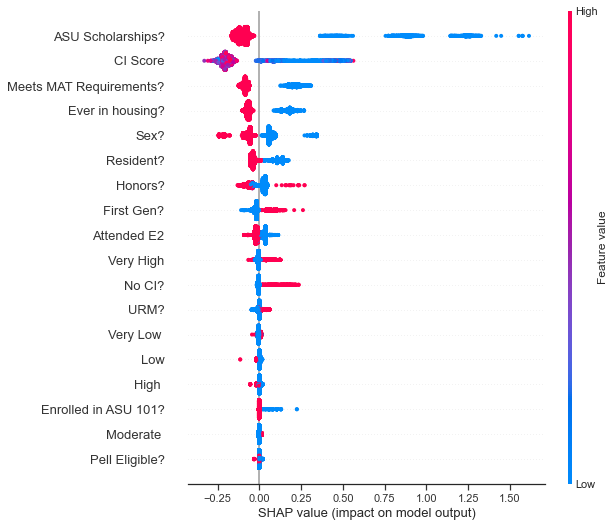

In [246]:
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


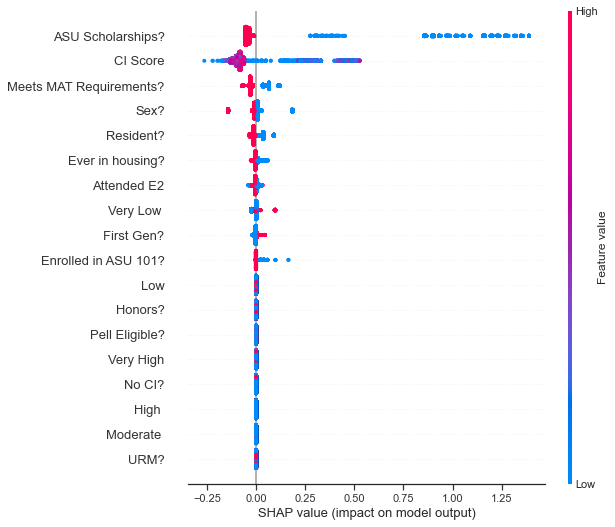

In [247]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [248]:
#cv score: -r
scores = cross_val_score(gb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(gb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(gb, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.9511
K-fold CV average score: 0.9511
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.95122594 0.95122594 0.95122594 0.95123237 0.95136418]
[0.95097522 0.95097522 0.95097522 0.95200422 0.95147679]


In [249]:
#cv score: -r
scores = cross_val_score(xgb, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(xgb, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.9508
K-fold CV average score: 0.9509
Training and testing accuracy score


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.95162141 0.95148959 0.95162141 0.95136418 0.95136418]
[0.95044808 0.95044808 0.95150237 0.95200422 0.95147679]


In [ ]:
# Hyperoptimization algorithm
# SHAP value dependency plot; why are there two groups of students within the ASU Scholarships? shap values?
# SHAP force plot - explains what impacted each prediction

# Gradient Boosting Evaluation

AUC is: 0.7350871106999692


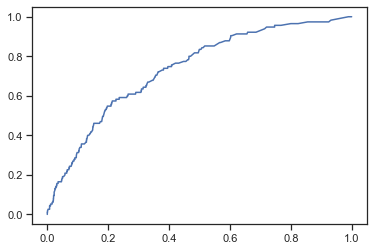

In [250]:
y_pred_d = clf_d.predict(X_test)
y_pred_prob_d = clf_d.predict_proba(X_test)


# change y_pred_prob to predicted to adjust threshold
fpr_d, tpr_d, thresholds = metrics.roc_curve(y_test, y_pred_prob_d[:,1], pos_label=1)
plt.plot(fpr_d, tpr_d)
print("AUC is: " + str(metrics.auc(fpr_d, tpr_d)))


[[1807  449]
 [  52   63]]
F1 score is: 0.20095693779904308


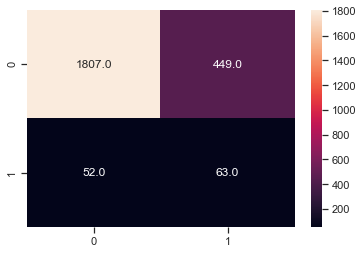

In [251]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_d = .067

predicted_d = (y_pred_prob_d[:,1] >= threshold_d).astype('int')
confusion_matrix_val_d = confusion_matrix(y_test, predicted_d)
print(confusion_matrix_val_d)
sn.heatmap(confusion_matrix_val_d, annot=True, fmt='.1f')

f1_score_val_d = f1_score(y_test, predicted_d,average='binary')
print("F1 score is: " + str(f1_score_val_d))

AUC is: 0.7204652328091274


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


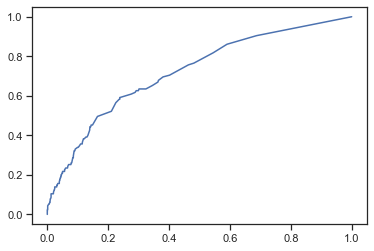

In [252]:
#Prediction based on XGB
y_pred_da = clf_da.predict(X_test)
y_pred_prob_da = clf_da.predict_proba(X_test)


# change y_pred_prob to predicted to adjust threshold
fpr_da, tpr_da, thresholds = metrics.roc_curve(y_test, y_pred_prob_da[:,1], pos_label=1)
plt.plot(fpr_da, tpr_da)
print("AUC is: " + str(metrics.auc(fpr_da, tpr_da)))

[[1884  372]
 [  58   57]]
F1 score is: 0.20955882352941174


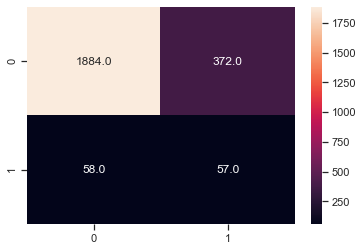

In [253]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_da = .1575

predicted_da = (y_pred_prob_da[:,1] >= threshold_da).astype('int')
confusion_matrix_val_da = confusion_matrix(y_test, predicted_da)
print(confusion_matrix_val_da)
sn.heatmap(confusion_matrix_val_da, annot=True, fmt='.1f')

f1_score_val_da = f1_score(y_test, predicted_da,average='binary')
print("F1 score is: " + str(f1_score_val_da))

# Logistic Regression - L1 Penalty

In [82]:
# l1 penalty is good for variable selection and interpretability
# C = 1/lambda; lower C => stronger regularization
C = [0.1,0.5,0.9, 10, 100, 1000,100000,1000000]
parameters_e = {'C':C}

# no balancing parameter
model_e =  LogisticRegression(penalty='l1',C=1,class_weight='balanced', multi_class='ovr', solver ='liblinear')
clf_e = GridSearchCV(model_e, parameters_e,return_train_score=True,cv=10, scoring = 'f1')
clf_e.fit(X_train, y_train)
score_e = clf_e.score(X_test, y_test)
clf_e.fit(X_train, y_train)
print('F1:{},Best parameters:{}'.format(score_e,clf_e.best_params_))

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


F1:0.15789473684210525,Best parameters:{'C': 1000}


In [254]:
l1 = LogisticRegression(penalty='l1',C=1000,class_weight='balanced', multi_class='ovr', solver ='liblinear')
l1.fit(X_train, y_train)

l1_coef = pd.DataFrame(l1.coef_.T, index=X.columns, columns=['coefficients']).sort_values('coefficients', ascending=False)
l1_coef

,coefficients
Very High,1.672000
High,1.410961
First Gen?,0.278788
Moderate,0.220487
Very Low,0.137120
Low,-0.007061
Honors?,-0.093306
URM?,-0.109621
Attended E2,-0.151320
Sex?,-0.392726


# Logistic Regression Evaluation

AUC is: 0.719154717853839


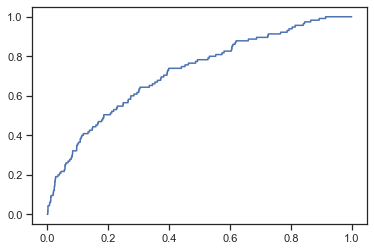

In [255]:
y_pred_e = l1.predict(X_test)
y_pred_prob_e = l1.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_e, tpr_e, thresholds = metrics.roc_curve(y_test, y_pred_prob_e[:,1], pos_label=1)
plt.plot(fpr_e, tpr_e)
print("AUC is: " + str(metrics.auc(fpr_e, tpr_e)))

[[1496  760]
 [  40   75]]
F1 score is: 0.15789473684210525


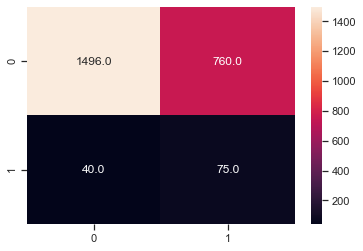

In [257]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_e = .5

predicted_e = (y_pred_prob_e[:,1] >= threshold_e).astype('int')
confusion_matrix_val_e = confusion_matrix(y_test, predicted_e)
print(confusion_matrix_val_e)
sn.heatmap(confusion_matrix_val_e, annot=True, fmt='.1f')

f1_score_val_e = f1_score(y_test, predicted_e,average='binary')
print("F1 score is: " + str(f1_score_val_e))


In [258]:
#cv score: -r
scores = cross_val_score(l1, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(l1, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(l1, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.6649
K-fold CV average score: 0.6618
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.66596362 0.67163195 0.67545479 0.66613945 0.66561223]
[0.7053242  0.71375857 0.65208224 0.6007384  0.69040084]


# Logistic Regression - L2 Penalty

In [260]:
# L2 penalty is good for multicollinearity problem
C = [0.1,0.5,0.9, 10, 100, 1000,1000000]
parameters_f = {'C':C}

# no balancing parameter
model_f =  LogisticRegression(penalty='l2',C=1,class_weight='balanced', multi_class='ovr', max_iter=100000)
clf_f = GridSearchCV(model_f, parameters_f,return_train_score=True,cv=10, scoring = 'f1')
clf_f.fit(X_train, y_train)
score_f = clf_f.score(X_test, y_test)
clf_f.fit(X_train, y_train)
print('F1:{},Best parameters:{}'.format(score_f,clf_f.best_params_))

F1:0.15789473684210525,Best parameters:{'C': 1000000}


In [261]:
l2 = LogisticRegression(penalty='l2',C=1000000,class_weight='balanced', multi_class='ovr', max_iter=100000)
l2.fit(X_train, y_train)

l2_coef = pd.DataFrame(l2.coef_.T, index=X.columns, columns=['coefficients']).sort_values('coefficients', ascending=False)
l2_coef

,coefficients
Very High,1.672815
High,1.411793
First Gen?,0.278697
Moderate,0.220962
Very Low,0.137548
Low,-0.006647
Honors?,-0.093098
URM?,-0.109663
Attended E2,-0.151418
Sex?,-0.392744


# Logistic Regression Evaluation

AUC is: 0.7192048257786001


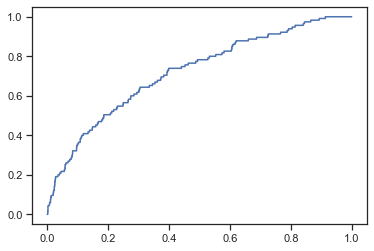

In [262]:
y_pred_f = clf_f.predict(X_test)
y_pred_prob_f = clf_f.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_f, tpr_f, thresholds = metrics.roc_curve(y_test, y_pred_prob_f[:,1], pos_label=1)
plt.plot(fpr_f, tpr_f)
print("AUC is: " + str(metrics.auc(fpr_f, tpr_f)))

[[1496  760]
 [  40   75]]
F1 score is: 0.15789473684210525


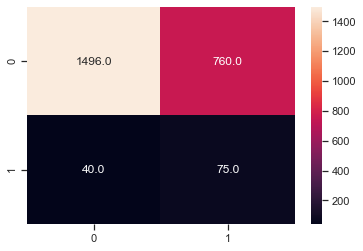

In [263]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_f = .5

predicted_f = (y_pred_prob_f[:,1] >= threshold_f).astype('int')
confusion_matrix_val_f = confusion_matrix(y_test, predicted_f)
print(confusion_matrix_val_f)
sn.heatmap(confusion_matrix_val_f, annot=True, fmt='.1f')

f1_score_val_f = f1_score(y_test, predicted_f,average='binary')
print("F1 score is: " + str(f1_score_val_f))


In [264]:
#cv score: - r
scores = cross_val_score(l2, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(l2, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(l2, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.6648
K-fold CV average score: 0.6661
Training and testing accuracy score
dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.66688637 0.67308199 0.676773   0.66429419 0.66587584]
[0.70848708 0.71481286 0.65313653 0.59810127 0.69092827]


# Decision Tree

In [266]:
#set random_state=0, got a consistant decision tree
max_depth=[2,3,4,5,6,7]
min_samples_split = [2,30,50,100,150]
max_features = [1, 3, 5, 7, 9, 12]
min_samples_leaf = [1,3,10,20,50]
parameters_g = {'max_depth':max_depth, 'min_samples_split':min_samples_split,'max_features':max_features, 'min_samples_leaf':min_samples_leaf}



model_g =  DecisionTreeClassifier(max_depth=10, min_samples_split=30, min_samples_leaf = 2, max_features=1, class_weight ='balanced',random_state=0)
clf_g = GridSearchCV(model_g, parameters_g,return_train_score=True,cv=10, scoring = 'f1')
clf_g.fit(X_train, y_train)
score_g = clf_g.score(X_test, y_test)
clf_g.fit(X_train, y_train)
print('F1:{},Best parameters:{}, feature importance:{}'.format(score_g,clf_g.best_params_,clf_g.best_estimator_.feature_importances_))


F1:0.17232375979112272,Best parameters:{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}, feature importance:[0.         0.00595286 0.         0.1215704  0.02050112 0.58779431
 0.09981136 0.         0.0935465  0.0030384  0.         0.
 0.         0.         0.         0.         0.00671572 0.06106933]


In [267]:
dt = DecisionTreeClassifier(max_depth = 4, max_features= 3, min_samples_leaf= 1, min_samples_split=2,random_state=0)
dt.fit(X_train, y_train)

dt_feature_importance = pd.DataFrame(dt.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
dt_feature_importance

,feature importance
CI Score,0.478948
ASU Scholarships?,0.171581
Very Low,0.126271
Ever in housing?,0.075142
Attended E2,0.068353
Resident?,0.047765
No CI?,0.024560
Sex?,0.007378
First Gen?,0.000000
Meets MAT Requirements?,0.000000


AUC is: 0.69506822386679


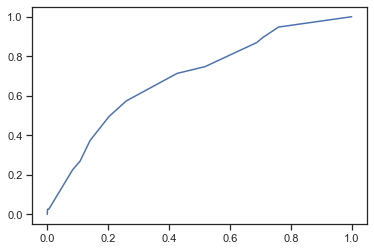

In [268]:
y_pred_g = clf_g.predict(X_test)
y_pred_prob_g = clf_g.predict_proba(X_test)

# change y_pred_prob to predicted to adjust threshold
fpr_g, tpr_g, thresholds = metrics.roc_curve(y_test, y_pred_prob_g[:,1], pos_label=1)
plt.plot(fpr_g, tpr_g)
print("AUC is: " + str(metrics.auc(fpr_g, tpr_g)))

[[1671  585]
 [  49   66]]
F1 score is: 0.17232375979112272


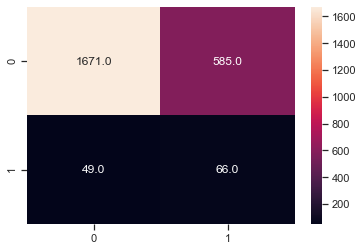

In [302]:
# use .predict or .predict_proba on new set of students to gain predictions on them
threshold_g = .53

predicted_g = (y_pred_prob_g[:,1] >= threshold_g).astype('int')
confusion_matrix_val_g = confusion_matrix(y_test, predicted_g)
print(confusion_matrix_val_g)
sn.heatmap(confusion_matrix_val_g, annot=True, fmt='.1f')

f1_score_val_g = f1_score(y_test, predicted_g,average='binary')
print("F1 score is: " + str(f1_score_val_g))


In [303]:
plt.figure(figsize=(35,15))
g = plot_tree(dt, feature_names=X_train.columns.values, class_names=True, filled=True, rounded=True, fontsize=15)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 2520x1080 with 0 Axes>

# SVM Implementation Trial-r

In [313]:
from sklearn.svm import LinearSVC
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9514972585407001

In [ ]:
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

In [ ]:
svcl = SVC()
svcl.fit(X_train, y_train)

svc_feature_importance = pd.DataFrame(svcl.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
svc_feature_importance
svcl.score(X_test,y_test)

# XGBoost RandomizedSearchCV -r

In [12]:
#Hyper Parameter Optimization
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}

In [13]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [14]:
model_da =  XGBClassifier(objective='binary:logistic',learning_rate=.1, n_estimators=100, max_depth=2,eta=.1,eval_metric='logloss',use_label_encoder=False)

In [15]:
clf_da = RandomizedSearchCV(model_da,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [16]:
from datetime import datetime
start_time = timer(None) # timing starts from this point for "start_time" variable
clf_da.fit(X_train, y_train)
score_da = clf_da.score(X_test, y_test)
clf_da.fit(X_train, y_train)
print('F1:{},Best parameters:{}, feature importance:{}'.format(score_da,clf_da.best_params_,clf_da.best_estimator_.feature_importances_))
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    6.0s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    7.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.6s finished
C:\Users\Rishab Sg\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    1.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.9s finished


F1:0.7214153561517114,Best parameters:{'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}, feature importance:[0.05025908 0.05139634 0.04633576 0.09907082 0.03784179 0.07885281
 0.04757554 0.08021195 0.05209611 0.0578402  0.03984908 0.05809059
 0.04187969 0.04713033 0.04845266 0.0436906  0.04970301 0.06972365]

 Time taken: 0 hours 0 minutes and 11.37 seconds.


In [17]:

clf_da.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
              eval_metric='logloss', gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [19]:
bp = clf_da.best_params_

In [20]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [22]:
xgb1 = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=6, eta=0.1, eval_metric='logloss', use_label_encoder=False)
xgb1.fit(X_train, y_train)

xgb_feature_importance1 = pd.DataFrame(xgb1.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
xgb_feature_importance1

,feature importance
No CI?,0.068025
URM?,0.063808
CI Score,0.063542
ASU Scholarships?,0.061726
High,0.060782
Pell Eligible?,0.059101
Meets MAT Requirements?,0.059069
Low,0.055268
Sex?,0.054138
Resident?,0.054112


In [24]:
score=cross_val_score(xgb1,X_train,y_train, cv=10)

In [25]:
score

array([0.9508427 , 0.9508427 , 0.95077356, 0.95218003, 0.95077356,
       0.94936709, 0.94796062, 0.95077356, 0.94936709, 0.94936709])

In [26]:
score.mean()

0.9502247981162787

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


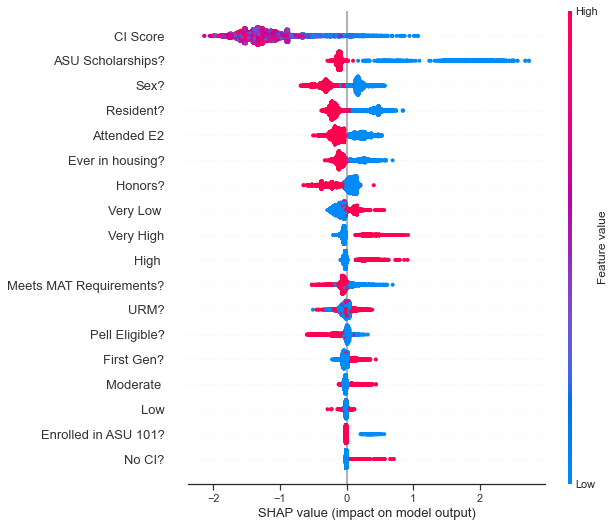

In [27]:
import shap
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

AUC is: 0.6953380357693494


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


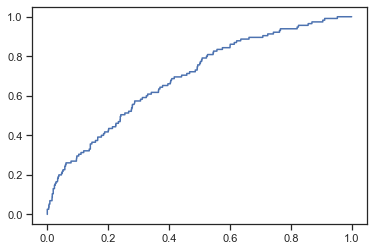

In [28]:
y_pred = clf_da.predict(X_test)
y_pred_prob = clf_da.predict_proba(X_test)

# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
plt.plot(fpr, tpr)
print("AUC is: " + str(metrics.auc(fpr, tpr)))

In [30]:
thresholds.mean()

0.055074945

[[1625  631]
 [  52   63]]
F1 score is: 0.15574783683559948


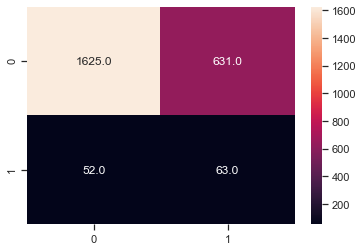

In [43]:
threshold = .055
predicted = (y_pred_prob[:,1] >= threshold).astype('int')

# Creating and displaying the confusion matrix
confusion_matrix_val = confusion_matrix(y_test, predicted)
print(confusion_matrix_val)
sn.heatmap(confusion_matrix_val, annot=True, fmt='.1f')

# Calculating F1 score for model evaluation/comparison
f1_score_val = f1_score(y_test, predicted,average='binary')
print("F1 score is: " + str(f1_score_val))

In [45]:
#cv score: -r
scores = cross_val_score(xgb1, X_train, y_train,cv=10)
print("Mean cross-validation score: %.4f" % scores.mean())

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb1, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

print('Training and testing accuracy score')
scores = cross_validate(xgb1, X, y, cv=5, scoring='accuracy', return_train_score=True)
print(scores.keys())# Will print dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

mean_tr = scores["train_score"]
mean_te = scores["test_score"]
print(mean_tr)  # Will print your training score
print(mean_te)  # Will print test score

Mean cross-validation score: 0.9502
K-fold CV average score: 0.9504
Training and testing accuracy score


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])
[0.95438967 0.95491695 0.95425784 0.95492289 0.95400026]
[0.95044808 0.94992093 0.95097522 0.94989451 0.94989451]


# Decision Tree Classification R